<a href="https://colab.research.google.com/github/nils-imhoff/MaschineLearning/blob/master/U%CC%88bung1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grundlagen Maschineller Lernverfahren | ML_INF18B | 2020
**Datum: 06.10.2020**

Ressourcen:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Linear Regression

In [1]:
# Lade notwendigen Bibliotheken

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Setup Pseudo Zufallszahlen

np.random.seed(2020)

In [3]:
# Daten erstellen

X = 2*np.random.rand(100,1) # Zufallswerte für die X-Achse
y = 4 + 3*X + np.random.rand(100,1) # Zufallswerte für die Y-Achse (folgt der Geradengleichung y = 3*X + 4)

In [4]:
# "Format" der erzeugten Daten anzeigen

X.shape

(100, 1)

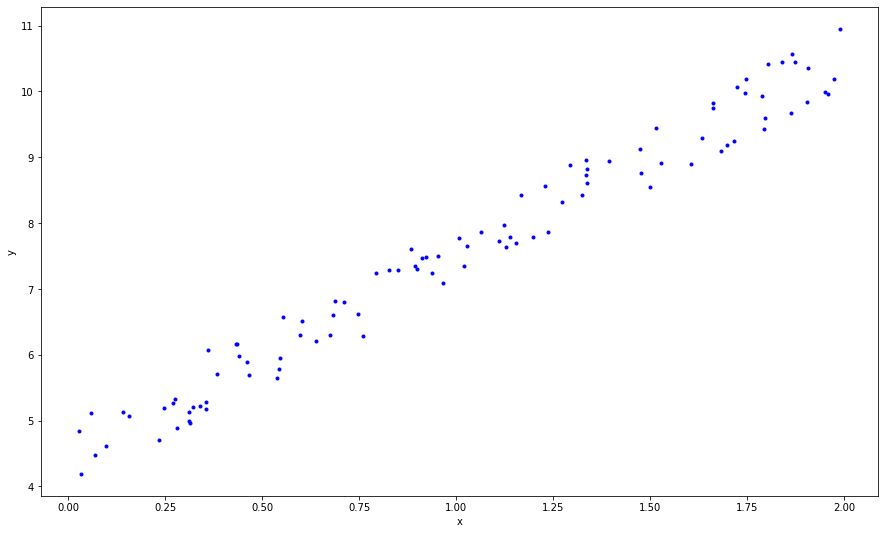

In [5]:
# Daten anzeigen

plt.figure(figsize=(15,9))
plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
# Erstelle zwei (neue) X-Werte zum Testen

X_unknown = np.array([[0],[2]])

In [7]:
# Lade Bibliothek

from sklearn.linear_model import LinearRegression

In [8]:
# Erstelle LR Modell

lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Trainiere das Modell

lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Lasse das Modell eine Vorhersage zu den neuen X-Werten treffen

y_pred = lin_reg.predict(X_unknown)

In [11]:
# Zeige die Vorhersage an

y_pred

array([[ 4.44475522],
       [10.55460064]])

In [12]:
# Analyse des Modell

b = lin_reg.intercept_ # w0
w = lin_reg.coef_ # w1...n

print("w0 = %f\t/\t w1 = %f" % (b,w))

w0 = 4.444755	/	 w1 = 3.054923


Hier gilt also konkret:

$h_w(x) = b + m*x = w0 + w_1*x_1 \approx 4.56 + 2.9*x$

(Beachte: Daten wurden gemäß der Gleichung y = 4 + 3*x erstellt -> also nicht so schlecht approximiert)


In [13]:
# Erstelle X Werte für das Zeichnen einer Geraden
Xline = np.linspace(0,2,100)
# print(Xline)

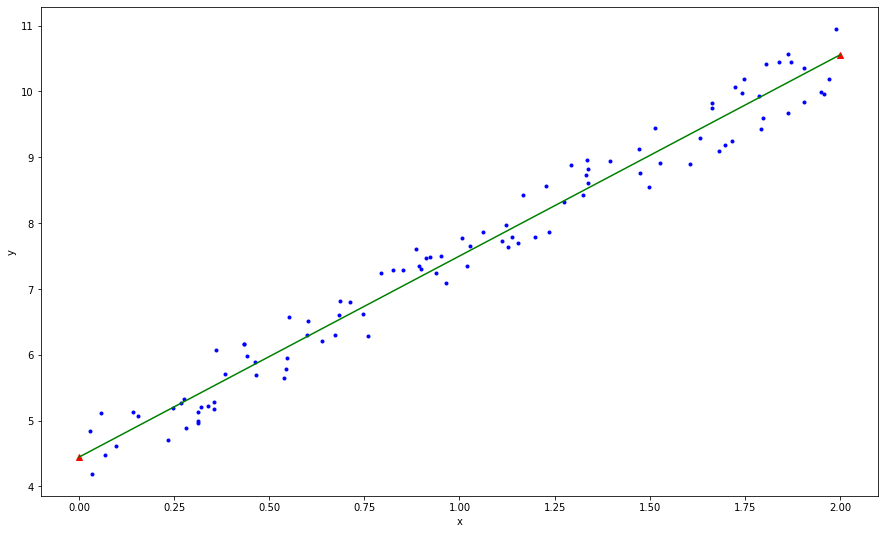

In [14]:
# Plot der Datenmenge, der Geraden und der beiden neuen X_unknown Werte
plt.figure(figsize=(15,9))
plt.plot(X,y,'b.')
plt.plot(X_unknown[0,0], y_pred[0,0],'r^')
plt.plot(X_unknown[1,0], y_pred[1,0],'r^')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(Xline, w[0]*Xline + b,'g')

plt.show()

## Polynomial Regression

In [15]:
# Setup

m = 100 # Anzahl Datenpunkte
X = 6*np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) # Polynom vom Grad 2

Die Daten werden also gemäß der folgenden Gleichung erzeugt:

$y= 0.5*X^2 + X + 2$

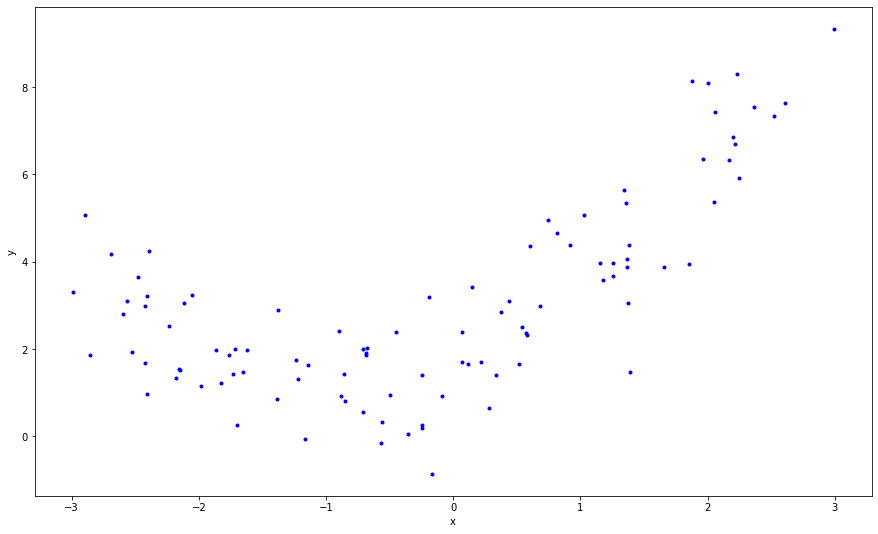

In [16]:
# Daten darstellen

plt.figure(figsize=(15,9))
plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
# Versuche die dargestellten Daten mit einer "simplen" Geraden anzugleichen

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

b = lin_reg.intercept_ #w0
w = lin_reg.coef_ #w1

print("w0 = %f\t/\t w1 = %f" % (b,w))

# Sagt das Modell für die trainierten X Werte die richtigen Y Werte vorher?
y_pred = lin_reg.predict(X)

#print(y_pred)

w0 = 3.215360	/	 w1 = 0.852957


In [18]:
# X-Werte für die zu zeichnende Gerade
Xline = np.linspace(-4,4,100)

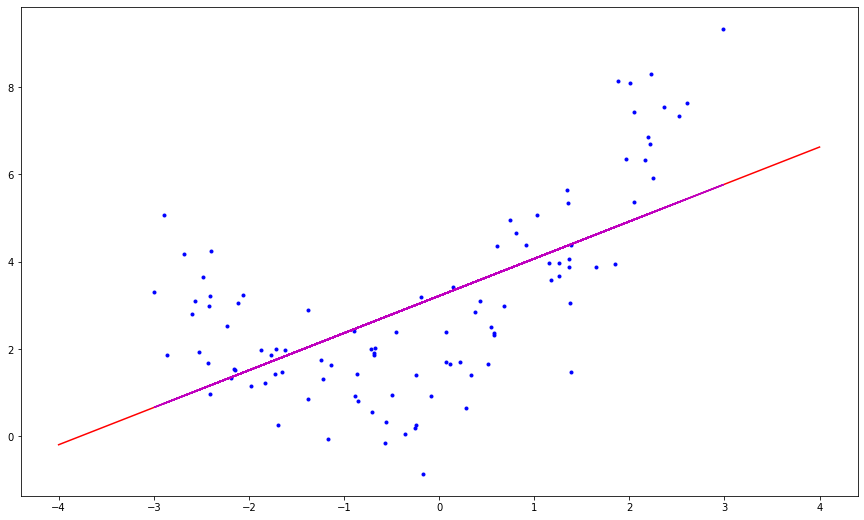

In [19]:
# Zeichne die Datenpunkte, die Vorhersage und die abgeleitete Gerade

plt.figure(figsize=(15,9))
plt.plot(X,y,'b.')
plt.plot(Xline, w[0]*Xline + b,'r')
plt.plot(X,y_pred,'m-')

plt.show()

In [20]:
# Berechnen mittleren quad. Fehler (MSE)

from sklearn.metrics import mean_squared_error

# Rufe Funktion mit Zielvariable und vorhergesagten Werten auf
mean_squared_error(y,y_pred)

2.904476581466562

In [21]:
# Lade Bibliothek für polynomielle Feature

from sklearn.preprocessing import PolynomialFeatures

In [22]:
# Wende polynomielle Features auf X Werte an

poly_features = PolynomialFeatures(degree=2, include_bias=False) # Hier: Polynom vom Grad 2
X_poly = poly_features.fit_transform(X) # Erstellt neuen Vektor mit "angepassten" Werten

Vorher:

> $w_0 + w_1*x_1$

Nach Anwendung der poly. Features:

> $w_0 + w_1*x_1 + w_2*x_2$ mit $x_2 = x_1^2$



In [23]:
# Vergleich der X-Werte ( = Feature)
print(X)
print(X_poly)

[[-2.18263208]
 [-2.48194858]
 [-1.3824693 ]
 [-1.98083528]
 [-0.85962253]
 [ 2.61074444]
 [ 0.51764938]
 [-1.62406311]
 [ 1.37348445]
 [ 1.25994503]
 [-2.05684375]
 [ 1.25852233]
 [ 0.91656972]
 [-0.19116576]
 [ 1.18094524]
 [-0.49702245]
 [-1.72992201]
 [-1.38011607]
 [-0.24533259]
 [ 0.74665516]
 [ 2.21551641]
 [ 1.85179246]
 [ 2.20169661]
 [ 0.37244951]
 [ 0.28519745]
 [-1.16810139]
 [-1.65386596]
 [-0.16820046]
 [ 1.9642038 ]
 [-2.1539149 ]
 [ 0.14739156]
 [ 0.573517  ]
 [ 2.05126227]
 [-0.84714938]
 [-0.24447928]
 [-1.23785499]
 [ 0.07273234]
 [-2.23257177]
 [-1.82545483]
 [ 0.43550415]
 [ 2.24916457]
 [ 2.05423346]
 [-2.59313938]
 [-1.13883234]
 [ 1.36539178]
 [ 2.36775901]
 [ 1.88018153]
 [ 1.02715426]
 [ 0.33933918]
 [ 0.68402408]
 [ 1.3822021 ]
 [-2.42536611]
 [-0.70811671]
 [-0.35851089]
 [ 0.81287119]
 [-1.8686618 ]
 [ 1.35847829]
 [-2.42155525]
 [ 2.00363716]
 [ 1.65379979]
 [-1.71180393]
 [ 2.98997106]
 [-1.69724424]
 [ 2.22752845]
 [-2.39455259]
 [-2.52596478]
 [ 1.15348

In [24]:
# Erstelle ein neue Modell und trainiere es mit den angepassten Werten
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly,y) # y bleibt gleich!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Zeige gelernte Parameter

b = lin_reg_poly.intercept_
w = lin_reg_poly.coef_

print("w0 = %f\t/\t w = %s"  % (b,w[0]))

w0 = 1.764885	/	 w = [1.05229338 0.56876022]


In [26]:
# Prüfe Vorhersage

y_pred_poly = lin_reg_poly.predict(X_poly)

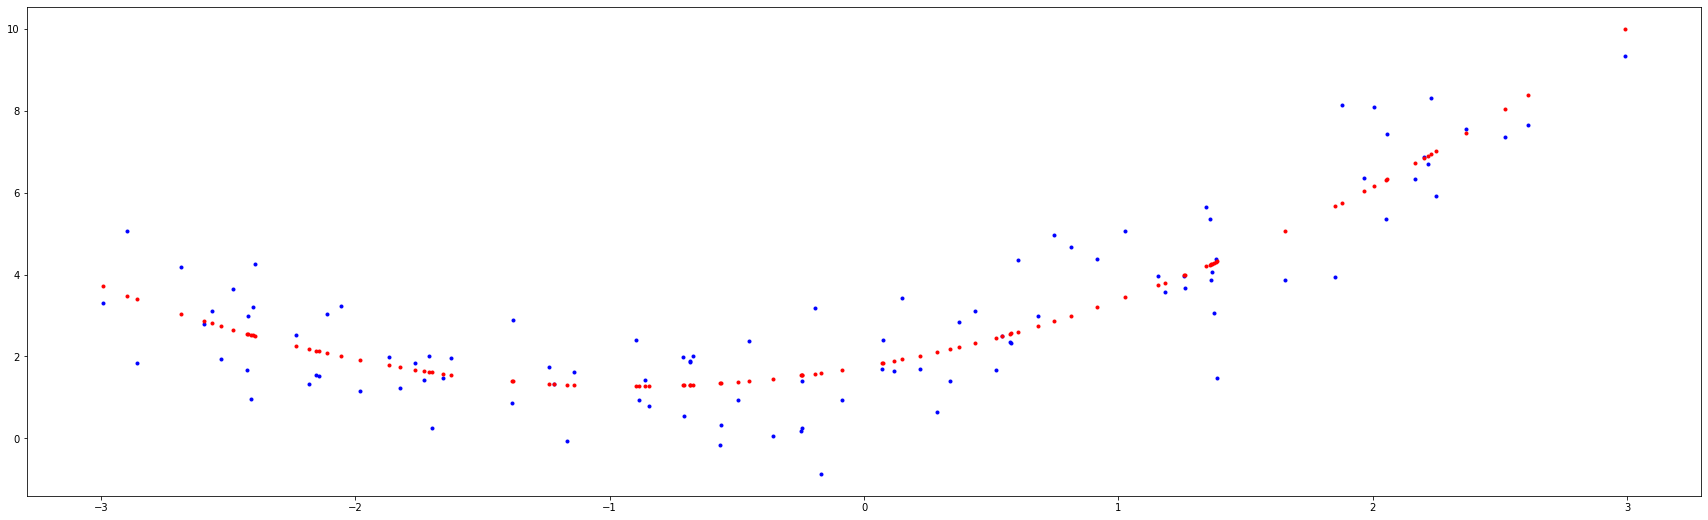

In [27]:
# Zeichne
plt.figure(figsize=(30,9))
plt.plot(X,y,'b.')
plt.plot(X,y_pred_poly,'r.')
plt.show()

In [28]:
# Berechnen mittleren quad. Fehler (MSE)
mean_squared_error(y, y_pred_poly)

1.0536969533647937

# Selbststudium

Im folgenden wird noch kurz gezeigt wie man "Pipelines" nutzt.
Damit lassen sich mehrere Schritte (z.B. PolynomialFeatures und die anschließende Lineare Regression) einfach zusammenfassen.

Mehr Infos dazu gibt es hier: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html


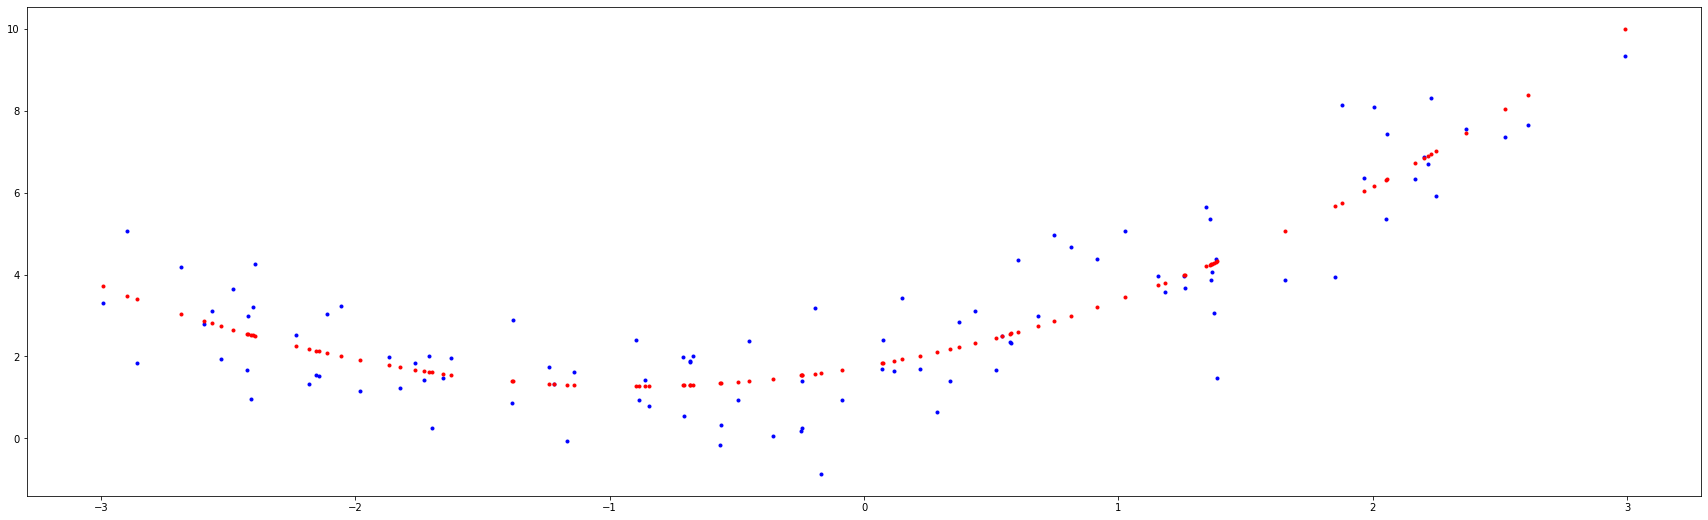

1.0536969533647937


In [29]:
# Lade Bibliothek
from sklearn.pipeline import make_pipeline

# Erstelle eine Pipeline namens "model"
#     Teil 1: PolynomialFeatures
#     Teil 2: Lineare Regression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Nun lassen sich die ehemals zwei Schritte einfach in einem Schritt zusammenfassen
model.fit(X, y)

# Vorhersage
y_pred = model.predict(X)

# Zeichnen
plt.figure(figsize=(30,9))
plt.plot(X,y,'b.')
plt.plot(X, y_pred,'r.')
plt.show()

# MSE berechnen
print(mean_squared_error(y, y_pred))



Vergleiche die Ergebnisse verschiedener Polynome

Degree 1:	 MSE = 2.9045
Degree 2:	 MSE = 1.0537
Degree 3:	 MSE = 1.0381


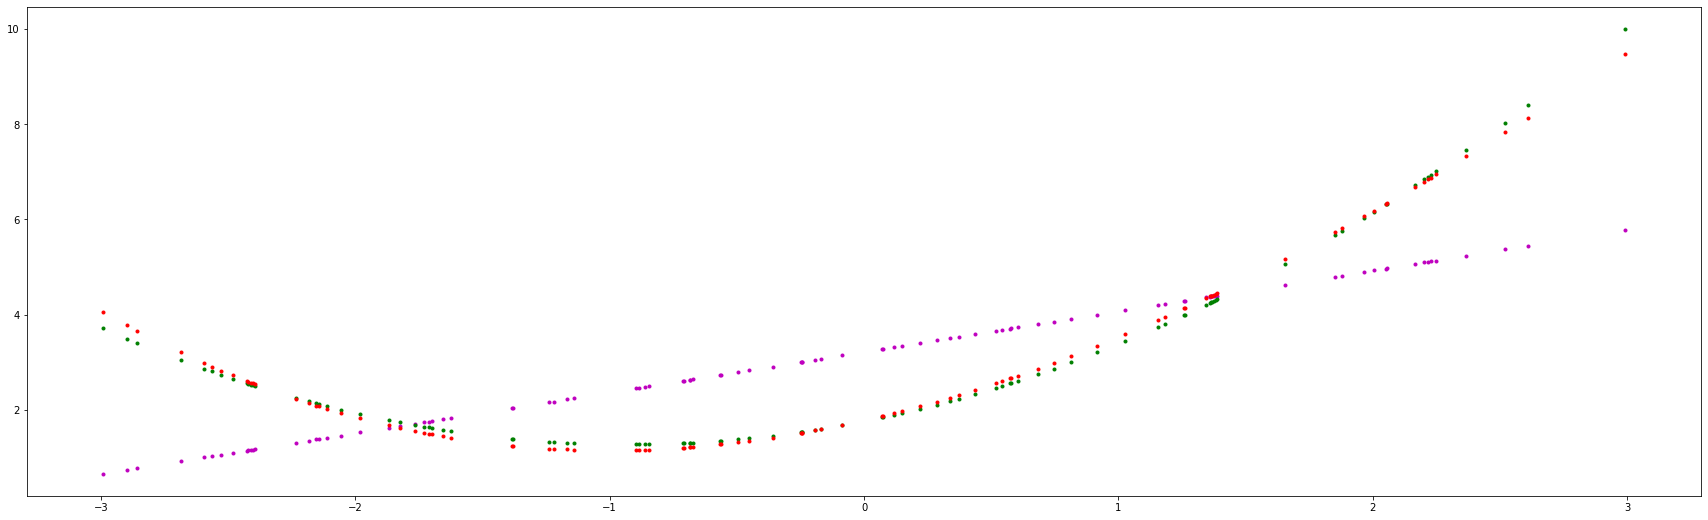

In [30]:
plt.figure(figsize=(30,9))
plt_color = ['m','g','r']

for d in range(3): # Achtung: startet mit 0 !
    d += 1
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred,'b.', color=plt_color[d-1])
    print("Degree %d:\t MSE = %2.4f" % (d, mean_squared_error(y, y_pred)))

plt.show()